In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 학습 관련 함수 정의

In [2]:
# loss
def mse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

In [3]:
# 정확도 계산
def eval_accuracy(y, y_hat):
	# 오차율 구하는 과정    
	# np.mean() 메서드의 이유는 미니배치 처리를 고려하여 하나의 지표로 묶어주기 위함 입니다. 
    mdiff = np.mean(np.abs((y_hat - y) / y))
    # 1 에서 오차율을 빼 정확도를 구합니다. 
    return 1 - mdiff

### 데이터 불러오기

In [4]:
# 데이터 불러오기
path = "/content/drive/MyDrive/team_project1/data/"

In [5]:
df = pd.read_csv(path + "Regression_data_label.csv")
print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# 데이터 나누기
X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((3341, 8), (836, 8))

### 1. Encoder 변경

#### 1-1. RandomForest

In [11]:
# 모델 생성
rf_model = RandomForestRegressor()

# 학습
rf_model.fit(X_train, y_train)

# 예측
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.638, Accuracy = 0.944 / Test - Loss = 5.681, Accuracy = 0.832


#### 1-2. Xgboost

In [9]:
# 모델 정의
xgb = XGBRegressor()

# 학습
xgb.fit(X_train, y_train)

# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.459, Accuracy = 0.947 / Test - Loss = 6.265, Accuracy = 0.825


#### 1-3. LightGBM

In [10]:
# 모델 정의
lgbm = LGBMRegressor()

# 학습
lgbm.fit(X_train, y_train)

# 예측
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.062, Accuracy = 0.891 / Test - Loss = 5.661, Accuracy = 0.834


### 2. 상관관계가 낮은 변수(Shucked weight) 삭제

In [50]:
X_train_drop = X_train.drop('Shucked weight', axis=1)
X_test_drop = X_test.drop('Shucked weight', axis=1)

X_train_drop.shape, X_test_drop.shape

#### 2-1. RandomForest

In [18]:
# 모델 생성
rf_model = RandomForestRegressor()

# 학습
rf_model.fit(X_train_drop, y_train)

# 예측
y_train_pred = rf_model.predict(X_train_drop)
y_test_pred = rf_model.predict(X_test_drop)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.673, Accuracy = 0.941 / Test - Loss = 6.788, Accuracy = 0.832


#### 2-2. Xgboost

In [19]:
# 모델 정의
xgb = XGBRegressor()

# 학습
xgb.fit(X_train_drop, y_train)

# 예측
y_train_pred = xgb.predict(X_train_drop)
y_test_pred = xgb.predict(X_test_drop)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.730, Accuracy = 0.935 / Test - Loss = 7.396, Accuracy = 0.827


#### 2-3. LightGBM

In [21]:
# 모델 정의
lgbm = LGBMRegressor()

# 학습
lgbm.fit(X_train_drop, y_train)

# 예측
y_train_pred = lgbm.predict(X_train_drop)
y_test_pred = lgbm.predict(X_test_drop)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.520, Accuracy = 0.880 / Test - Loss = 7.001, Accuracy = 0.833


### 3. 모델 하이퍼파라미터 변경

In [7]:
from sklearn.model_selection import GridSearchCV

#### 3-1. RandomForest

In [8]:
# 모델 생성
rf = RandomForestRegressor()

In [14]:
# 그리드 서치
rf_parmas = {
    'random_state':[42],
    'max_features':[None],
    'max_depth': [3, 6, 9],
    'min_samples_split':[2, 3, 6, 9]

}

gridsearch_rf = GridSearchCV(estimator=rf,
                                   param_grid=rf_parmas,
                                   cv=5)

In [15]:
# 학습 진행
gridsearch_rf.fit(X_train, y_train)
print(f'최적 하이퍼파라미터 : {gridsearch_rf.best_params_}')

최적 하이퍼파라미터 : {'max_depth': 9, 'max_features': None, 'min_samples_split': 9, 'n_estimators': 150, 'random_state': 42}


In [16]:
# 예측
y_train_pred = gridsearch_rf.best_estimator_.predict(X_train)
y_test_pred = gridsearch_rf.best_estimator_.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.312, Accuracy = 0.888 / Test - Loss = 5.155, Accuracy = 0.848


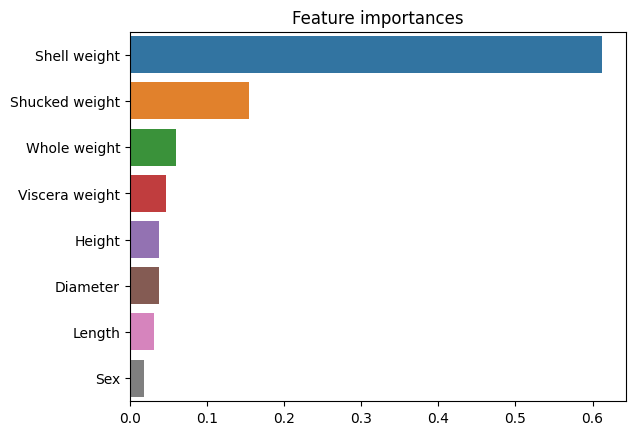

In [19]:
importances_values = gridsearch_rf.best_estimator_.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top = importances.sort_values(ascending=False)
# plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x = top, y = top.index)
plt.show()

#### 3-2. Xgboost
- eta(0.3): weak learner의 반영 수준을 나타냄. 클수록 과적합 이슈 발생 가능성 높음
- min_child_weight(1): leaf node에 포함되는 최소 관측치의 수를 의미. 작은 값을 가질수록 과적합 발생 가능성 높음
- max_depth(6): 트리의 최대 깊이를 설정. 과적합에 가장 민감하게 작용하는 파라미터 중 하나

In [20]:
# 모델 정의
xgb = XGBRegressor()

In [21]:
# 그리드 서치
xgb_parmas = {
    'eta':[0.05, 0.1, 0.3, 0.5], # learning rate
    'min_child_weight': [1, 3, 6, 9],
    'max_depth': [3, 6, 9]

}

gridsearch_xgb = GridSearchCV(estimator=xgb,
                                   param_grid=xgb_parmas,
                                   cv=5)

In [22]:
# 학습 진행
gridsearch_xgb.fit(X_train, y_train)
print(f'최적 하이퍼파라미터 : {gridsearch_xgb.best_params_}')

최적 하이퍼파라미터 : {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 9}


In [23]:
# 예측
y_train_pred = gridsearch_xgb.best_estimator_.predict(X_train)
y_test_pred = gridsearch_xgb.best_estimator_.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 3.595, Accuracy = 0.864 / Test - Loss = 5.252, Accuracy = 0.846


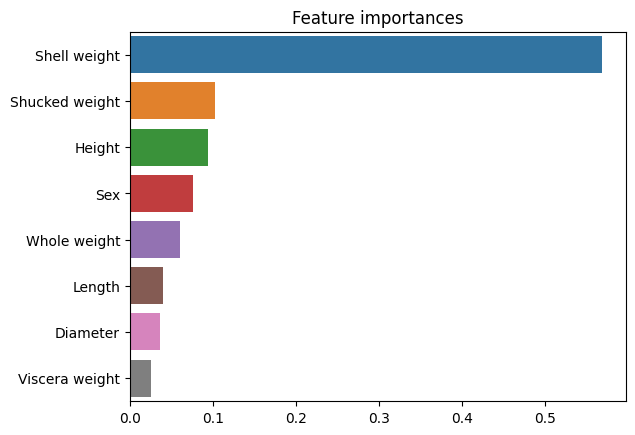

In [24]:
importances_values = gridsearch_xgb.best_estimator_.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top = importances.sort_values(ascending=False)
# plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x = top, y = top.index)
plt.show()

#### 3-3. LightGBM

In [25]:
# 모델 정의
lgbm = LGBMRegressor()

In [28]:
# 그리드 서치
lgbm_parmas = {
    'learning_rate':[0.05, 0.1, 0.3, 0.5],
    'max_depth': [-1, 3, 6, 9],
    'n_estimators': [100, 300, 500]

}

gridsearch_lgbm = GridSearchCV(estimator=lgbm,
                                   param_grid=lgbm_parmas,
                                   cv=5)

In [29]:
# 학습 진행
gridsearch_lgbm.fit(X_train, y_train)
print(f'최적 하이퍼파라미터 : {gridsearch_lgbm.best_params_}')

최적 하이퍼파라미터 : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [30]:
# 예측
y_train_pred = gridsearch_lgbm.best_estimator_.predict(X_train)
y_test_pred = gridsearch_lgbm.best_estimator_.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 3.421, Accuracy = 0.866 / Test - Loss = 5.194, Accuracy = 0.847


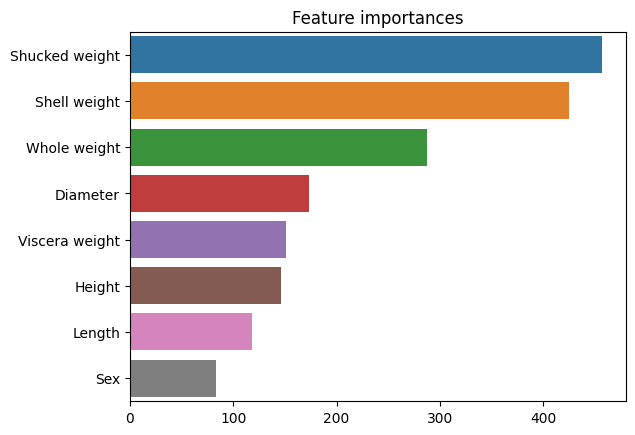

In [31]:
importances_values = gridsearch_lgbm.best_estimator_.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top = importances.sort_values(ascending=False)
# plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x = top, y = top.index)
plt.show()

### 4. PCA 진행